In [1]:
!wget -r -np -nH --cut-dirs=3 -R "index.html*" \
https://physionet.org/files/challenge-2016/1.0.0/training-a/

Streaming output truncated to the last 5000 lines.
Length: 104 [text/plain]
Saving to: ‘training-a/a0243.hea’

training-a/a0243.he 100%[===================>]     104  --.-KB/s    in 0s      

2025-04-30 08:02:48 (82.8 MB/s) - ‘training-a/a0243.hea’ saved [104/104]

--2025-04-30 08:02:48--  https://physionet.org/files/challenge-2016/1.0.0/training-a/a0243.wav
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 144938 (142K) [text/plain]
Saving to: ‘training-a/a0243.wav’

training-a/a0243.wa 100%[===================>] 141.54K   240KB/s    in 0.6s    

2025-04-30 08:02:48 (240 KB/s) - ‘training-a/a0243.wav’ saved [144938/144938]

--2025-04-30 08:02:48--  https://physionet.org/files/challenge-2016/1.0.0/training-a/a0244.dat
Reusing existing connection to physionet.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 142386 (139K) [application/octet-stream]
Saving to: ‘training-a/a0244.dat’

training-a/a0244.da 100%[===========

In [71]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.io import wavfile

In [72]:
dataset_path = '/content/training-a'

# List all the files in the directory
files = os.listdir(dataset_path)
print(files[:10])  # Show the first 10 files to confirm that we have the correct dataset


['a0241.dat', 'a0005.hea', 'a0098.dat', 'a0160.dat', 'a0206.hea', 'a0182.hea', 'a0210.dat', 'a0002.hea', 'a0089.wav', 'a0307.hea']


In [73]:
import pandas as pd
import os

# Set the path to the folder containing .wav files
wav_folder = '/content/training-a/'

# List all .wav files in the folder
wav_files = [file for file in os.listdir(wav_folder) if file.endswith('.wav')]
wav_files.sort()
wav_files[:30]

['a0001.wav',
 'a0002.wav',
 'a0003.wav',
 'a0004.wav',
 'a0005.wav',
 'a0006.wav',
 'a0007.wav',
 'a0008.wav',
 'a0009.wav',
 'a0010.wav',
 'a0011.wav',
 'a0012.wav',
 'a0013.wav',
 'a0014.wav',
 'a0015.wav',
 'a0016.wav',
 'a0017.wav',
 'a0018.wav',
 'a0019.wav',
 'a0020.wav',
 'a0021.wav',
 'a0022.wav',
 'a0023.wav',
 'a0024.wav',
 'a0025.wav',
 'a0026.wav',
 'a0027.wav',
 'a0028.wav',
 'a0029.wav',
 'a0030.wav']

Sample Rate: 22050
Audio Duration: 35.59650793650793 seconds


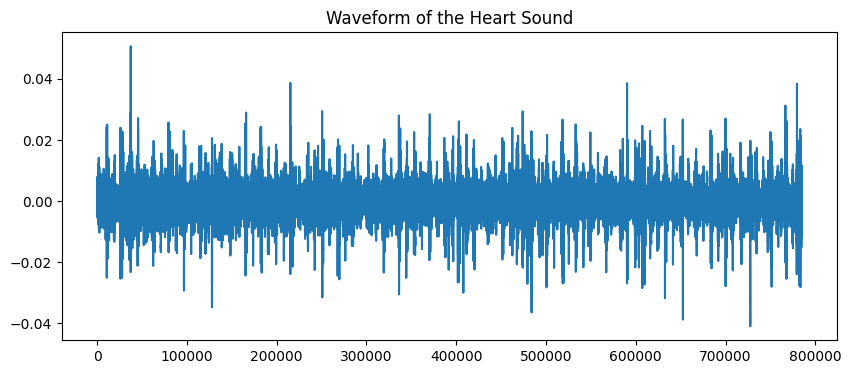

In [90]:
#Audio processing
import librosa
import matplotlib.pyplot as plt

# Load a .wav file
file_path = '/content/training-a/a0201.wav'
y, sr = librosa.load(file_path)

# Display some properties
print(f"Sample Rate: {sr}")
print(f"Audio Duration: {librosa.get_duration(y=y, sr=sr)} seconds")

# Plot the waveform of the audio
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title("Waveform of the Heart Sound")
plt.show()

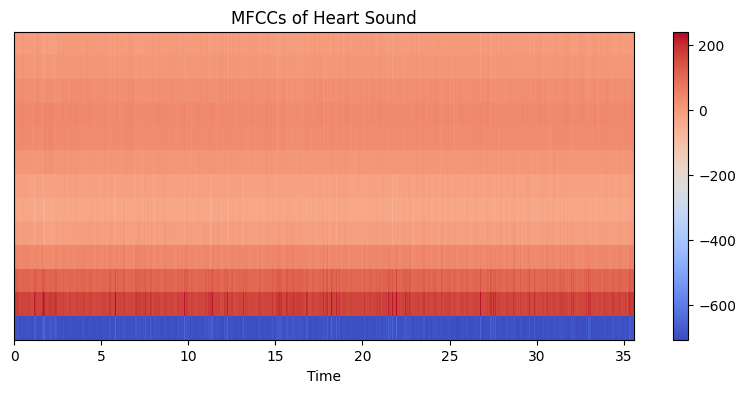

In [91]:
# Extract MFCCs from the audio
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCCs of Heart Sound")
plt.show()

In [75]:
# Load the REFERENCE.csv file with file_id and label
reference_csv_path = '/content/training-a/REFERENCE.csv'
reference_df = pd.read_csv(reference_csv_path, header=None, names=['file_id', 'label'], dtype={'file_id': str})

# Strip any extra spaces in the 'file_id' column
reference_df['file_id'] = reference_df['file_id'].str.strip()

# Match the .wav files with the file_id in the REFERENCE.csv
matched_files = [file for file in wav_files if file.replace('.wav', '') in reference_df['file_id'].values]

# Filter out the matching labels from the reference_df
matched_labels = reference_df[reference_df['file_id'].isin([file.replace('.wav', '') for file in matched_files])]

print(f"Matched Files: {matched_files[:10]}")  # Show a few matched files for inspection
print(f"Matched Labels: {matched_labels.head(10)}")  # Show the first few rows of matched labels


Matched Files: ['a0001.wav', 'a0002.wav', 'a0003.wav', 'a0004.wav', 'a0005.wav', 'a0006.wav', 'a0007.wav', 'a0008.wav', 'a0009.wav', 'a0010.wav']
Matched Labels:   file_id  label
0   a0001      1
1   a0002      1
2   a0003      1
3   a0004      1
4   a0005      1
5   a0006      1
6   a0007     -1
7   a0008      1
8   a0009     -1
9   a0010      1


In [76]:
# Replace all occurrences of -1 with 0 in the 'label' column
matched_labels['label'] = matched_labels['label'].replace(-1, 0)

# Verify the change
print(f"Updated Matched Labels: \n{matched_labels.head(10)}")


Updated Matched Labels: 
  file_id  label
0   a0001      1
1   a0002      1
2   a0003      1
3   a0004      1
4   a0005      1
5   a0006      1
6   a0007      0
7   a0008      1
8   a0009      0
9   a0010      1


In [77]:
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define a function to extract MFCC features
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)  # Load audio file
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract 13 MFCC features
    return np.mean(mfccs.T, axis=0)  # Return the mean of MFCCs across time frames

# Initialize lists for features and labels
features = []
labels = []

# Extract features for each matched file
for file in matched_files:
    # Construct the file path for each .wav file
    file_path = os.path.join(wav_folder, file)

    # Extract the features (MFCCs)
    file_features = extract_features(file_path)

    # Get the corresponding label from the reference dataframe
    file_id = file.replace('.wav', '')  # Strip '.wav' from filename to match file_id
    file_label = matched_labels[matched_labels['file_id'] == file_id]['label'].values[0]

    # Append the features and label to the lists
    features.append(file_features)
    labels.append(file_label)

# Convert lists to numpy arrays
features = np.array(features)
labels = np.array(labels)

# Encode the labels (if necessary)
labels_encoded = LabelEncoder().fit_transform(labels)

# Print the shape of the feature matrix and labels array
print(f"Features Shape: {features.shape}")
print(f"Labels Shape: {labels_encoded.shape}")


Features Shape: (409, 13)
Labels Shape: (409,)


In [78]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Normalize the features
X_normalized = scaler.fit_transform(features)

print(f"Normalized Features Shape: {X_normalized.shape}")


Normalized Features Shape: (409, 13)


In [79]:
from sklearn.model_selection import train_test_split

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")


Training Features Shape: (327, 13)
Testing Features Shape: (82, 13)
Training Labels Shape: (327,)
Testing Labels Shape: (82,)


In [81]:
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [82]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

# Define CNN + LSTM model
model = Sequential()

# Add CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Add another CNN layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# Add LSTM layer
model.add(LSTM(64, return_sequences=False))

# Add Dense layer for classification
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification (0 or 1)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 11, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 3, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,481 (298.75 KB)

 Trainable params: 76,481 (298.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.7172 - loss: 0.6583 - val_accuracy: 0.7195 - val_loss: 0.5941
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7221 - loss: 0.5875 - val_accuracy: 0.7195 - val_loss: 0.5757
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6952 - loss: 0.6262 - val_accuracy: 0.7195 - val_loss: 0.5735
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7029 - loss: 0.6041 - val_accuracy: 0.7195 - val_loss: 0.5605
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7147 - loss: 0.5841 - val_accuracy: 0.7195 - val_loss: 0.5505
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7114 - loss: 0.5752 - val_accuracy: 0.7195 - val_loss: 0.5419
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7281 - loss: 0.5669 - val_accuracy: 0.7195 - val_loss: 0.5291
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7020 - loss: 0.5722 - val_accuracy: 0.

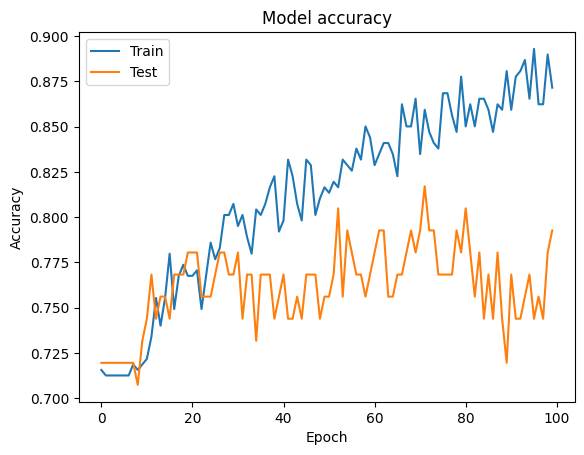

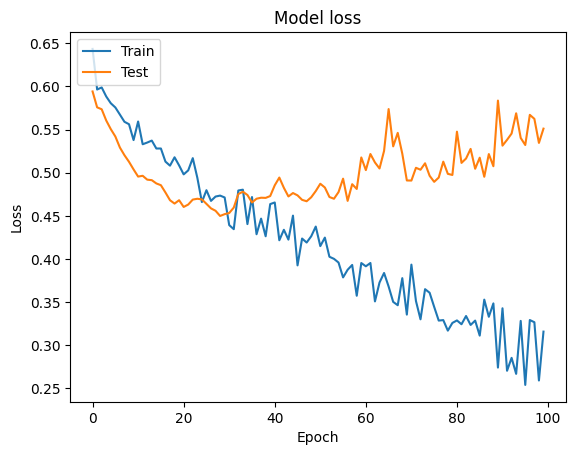

In [83]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7870 - loss: 0.5531
Test Accuracy: 79.27%
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.88      0.83      0.85        59

    accuracy                           0.79        82
   macro avg       0.75      0.76      0.75        82
weighted avg       0.80      0.79      0.80        82



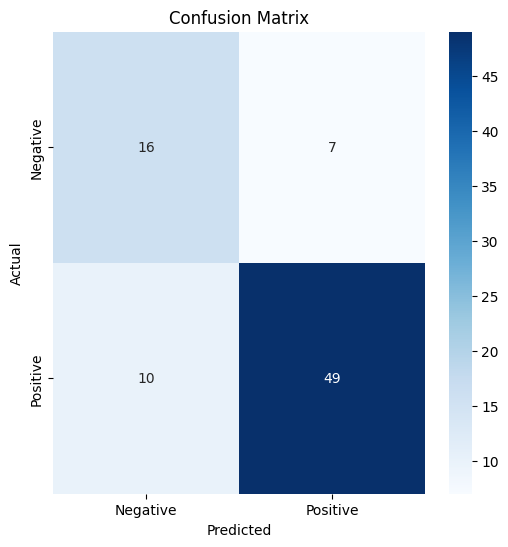

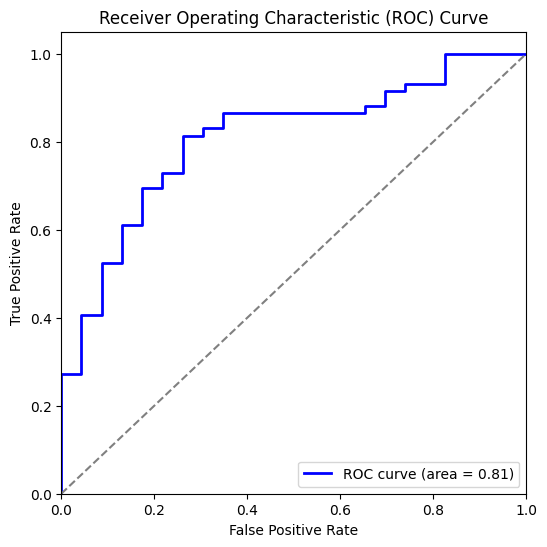

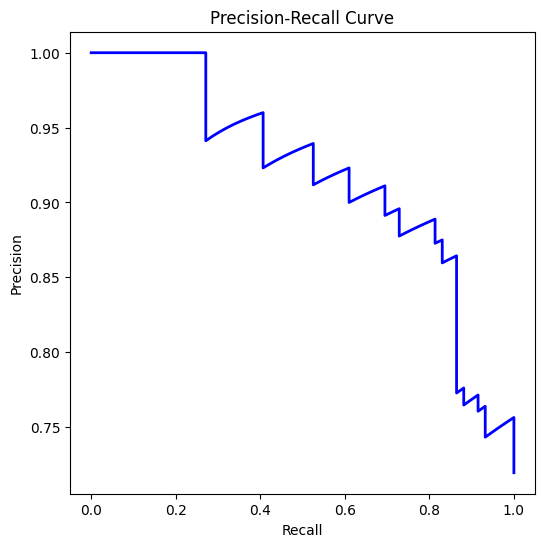

Accuracy: 79.27%
Precision: 87.50%
Recall: 83.05%
F1 Score: 85.22%
AUC: 0.81


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions
y_pred = model.predict(X_test_reshaped)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Thresholding for binary classification

# Classification Report (Precision, Recall, F1 Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Additional Metrics:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Precision
precision = precision_score(y_test, y_pred_classes)
print(f"Precision: {precision * 100:.2f}%")

# Recall
recall = recall_score(y_test, y_pred_classes)
print(f"Recall: {recall * 100:.2f}%")

# F1 Score
f1 = f1_score(y_test, y_pred_classes)
print(f"F1 Score: {f1 * 100:.2f}%")

# AUC (Area Under Curve)
print(f"AUC: {roc_auc:.2f}")


In [85]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred_classes)
print(f"Matthews Correlation Coefficient: {mcc:.2f}")


Matthews Correlation Coefficient: 0.51


In [86]:
tpr = recall  # Recall is also the True Positive Rate
print(f"True Positive Rate (Sensitivity): {tpr * 100:.2f}%")

True Positive Rate (Sensitivity): 83.05%


In [87]:
fpr = fpr  # False Positive Rate is obtained directly from the ROC curve
print(f"False Positive Rate: {fpr[1] * 100:.2f}%")

False Positive Rate: 0.00%


In [88]:
specificity = 1 - fpr[1]
print(f"Specificity: {specificity * 100:.2f}%")

Specificity: 100.00%


In [89]:
tn, fp, fn, tp = conf_matrix.ravel()
npv = tn / (tn + fn)  # Negative Predictive Value formula
print(f"Negative Predictive Value (NPV): {npv * 100:.2f}%")

Negative Predictive Value (NPV): 61.54%


In [93]:
model.save("final_model.keras")